#                **PREDICTING CUSTOMER BEHAVIOR**


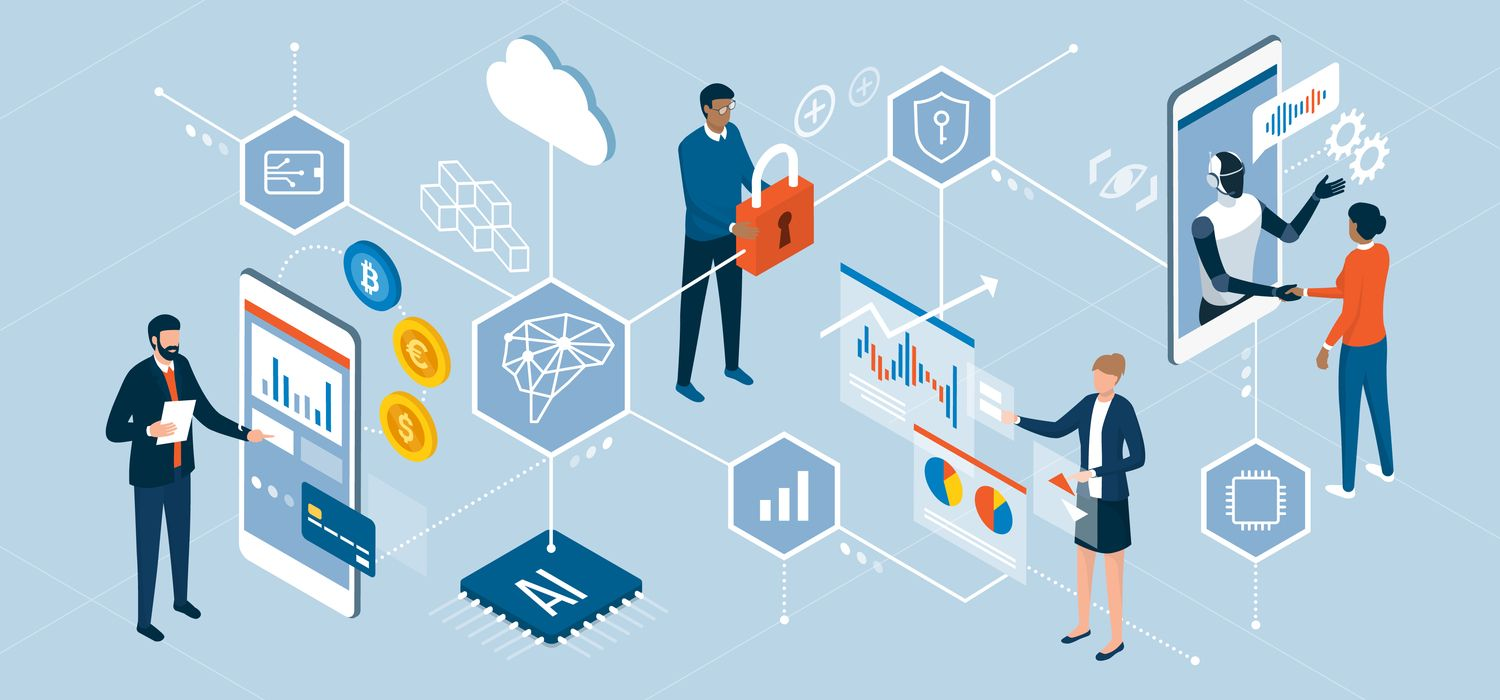


**Understanding the Data**

The data is customer dataset which consists of;
*   UserID: This is a unique id generated for each customers that made purchase.
*   Gender: The gender of the customers to know whether they are male or female
*   EstimatedSalary: This consists of each customers estimated salary
*   age: This is the age of the customers
*   Purchased: This consists of binary values 0's and 1's where 0 indicates not-purchased and 1 indicates pucshased



**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import itertools

***Load the dataset***

In [2]:
cb = pd.read_csv("/content/drive/MyDrive/Customer_Behaviour.csv")
print(cb.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
cb.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Interpretation of the Descriptive Statistics
- The descriptive statistics shows that each feature of the datasets consists of 400 entries. Which indicates that there are no missing values.
- Also, the age features shows that the minimum customer age is 18 while the maximum customer age is 60 and average age is 37.
- The minimum expected salary is 15,000 while the maximum salary is 150,000 and the average expected salary of the customer is 70,000.  

In [5]:
# Checking whether the dataset has empty or missing values

cb.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

As shown in the result, the dataset is balanced. Meaning there are no missing values.

In [6]:
# checking duplicate values

cb.duplicated().sum()

0

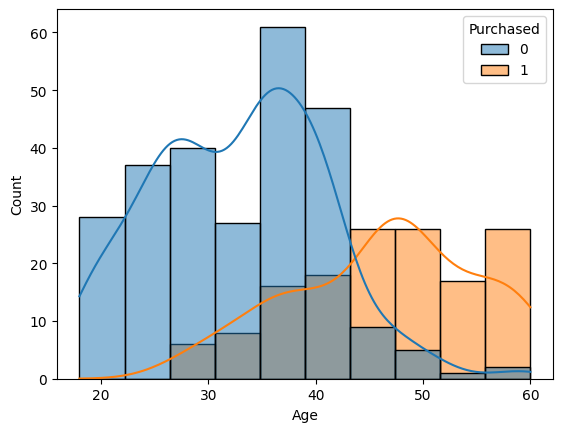

In [7]:
sns.histplot(data=cb, x='Age', kde=True, hue='Purchased');

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

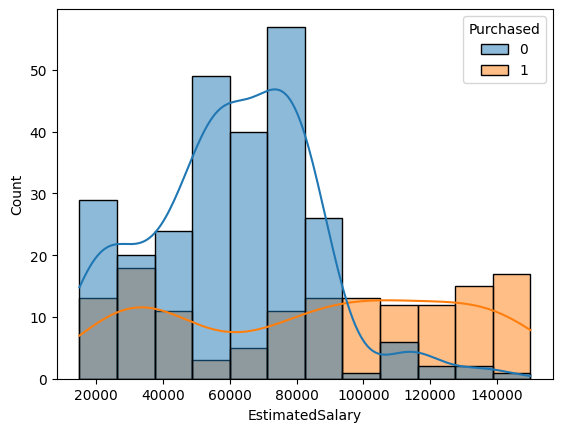

In [8]:
sns.histplot(data=cb, x='EstimatedSalary', kde=True, hue='Purchased')

<ipython-input-9-52295a7730c9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cb, x='Purchased', palette=['red', 'blue']);


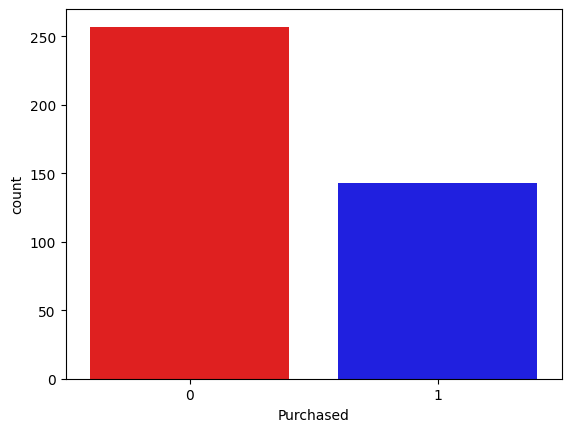

In [9]:
sns.countplot(data=cb, x='Purchased', palette=['red', 'blue']);

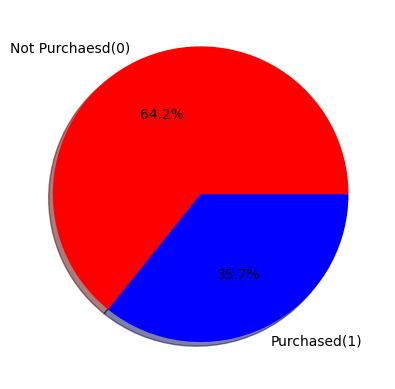

In [10]:
# fig, axes = plt.subplots(figsize=(10,8))
slices = cb.Purchased.value_counts().values
chart = ['Not Purchaesd(0)', 'Purchased(1)']
plt.pie(slices, labels=chart, colors=['red', 'blue'],  autopct='%1.1f%%', shadow=True);

# **Data Preprocessing**

In [11]:
# dropping the userID column since its not so important in the dataset

cb.drop('User ID', axis=1, inplace=True)
cb

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


## Creating New Features


## The below features will be created to enhance the predictive power of the model:
*   Age group
*   Income level
*   Gender Encoding




In [12]:
# Age Group
bins = [18, 30, 45, 60]
labels = ['18-30', '31-45', '46-60']

cb['Age_Group']=pd.cut(cb['Age'], bins=bins, labels=labels, right=False)
cb.head()

,Gender,Age,EstimatedSalary,Purchased,Age_Group
0,Male,19,19000,0,18-30
1,Male,35,20000,0,31-45
2,Female,26,43000,0,18-30
3,Female,27,57000,0,18-30
4,Male,19,76000,0,18-30


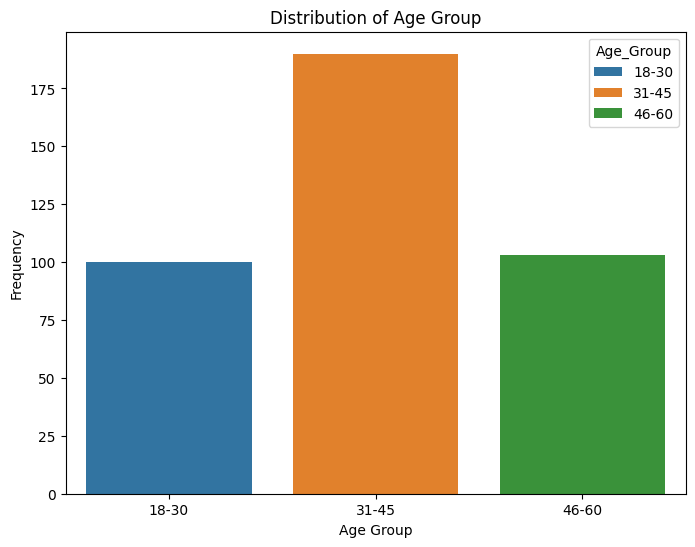

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='Age_Group', data=cb, hue='Age_Group')
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

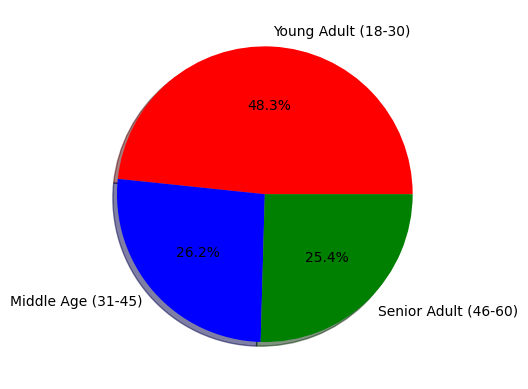

In [14]:
slices = cb['Age_Group'].value_counts().values
chart = ['Young Adult (18-30)', 'Middle Age (31-45)', 'Senior Adult (46-60)']
assert len(slices) == len(chart), "Length mismatch between slices and labels"
plt.pie(slices, labels=chart, colors=['red', 'blue', 'green'],  autopct='%1.1f%%', shadow=True)
plt.show()

## Income level feature

In [15]:
bins = [15000, 30000, 60000, 90000, 120000, 150000]
income_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
cb['Income_Level'] = pd.cut(cb['EstimatedSalary'], bins=bins, labels=income_labels, right=False)
cb.head()

,Gender,Age,EstimatedSalary,Purchased,Age_Group,Income_Level
0,Male,19,19000,0,18-30,Very Low
1,Male,35,20000,0,31-45,Very Low
2,Female,26,43000,0,18-30,Low
3,Female,27,57000,0,18-30,Low
4,Male,19,76000,0,18-30,Medium


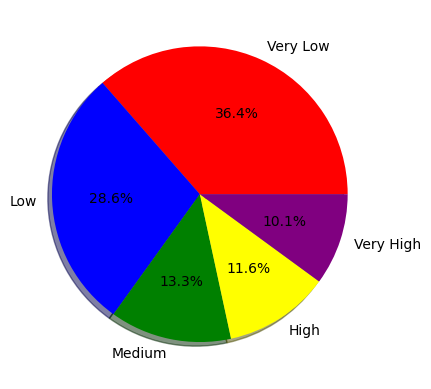

In [16]:
slices = cb['Income_Level'].value_counts().values
income_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
plt.pie(slices, labels=income_labels, colors=['red', 'blue', 'green', 'yellow', 'purple'], autopct='%1.1f%%', shadow=True);

## Encoding the Income level

Since income level is a categorical variable, we will need to encode it using ordinal encoder.


In [17]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


In [18]:
import category_encoders as ce

ordinal_encoder = ce.OrdinalEncoder(
    cols=['Income_Level'],
    mapping=[{'col': 'Income_Level', 'mapping':{'Very Low':0, 'Low':1, 'Medium':2, 'High':3, 'Very High':4}}])
cb['Income_Level'] = ordinal_encoder.fit_transform(cb['Income_Level'])

## Encoding the categporical feature['Gender'] to binary values

In [19]:
cb['Gender'] = cb['Gender'].map({'Female':0, 'Male':1})
cb.sample()

,Gender,Age,EstimatedSalary,Purchased,Age_Group,Income_Level
284,1,48,141000,0,46-60,4.0


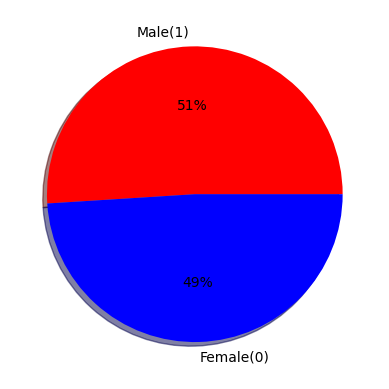

In [20]:
slices = cb['Gender'].value_counts().values
gender = ['Male(1)', 'Female(0)']
plt.pie(slices, labels=gender, colors=['red', 'blue'], autopct='%2.0f%%', shadow=True);

# Bivariate Analysis

## count of purchased based on their gender

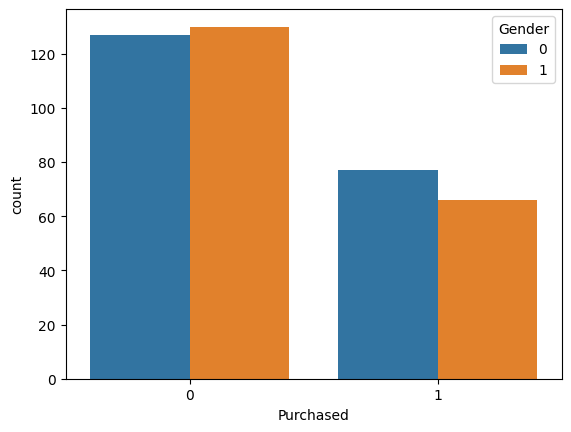

In [21]:
ax = sns.countplot(data=cb, x='Purchased', hue='Gender')
# for container in ax.containers:
#   ax.bar_label(container)
# plt.title('Count of Purchased Based on Gender', fontdict=font, pad=15)

<ipython-input-21-672aed57e764>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cb.corr()


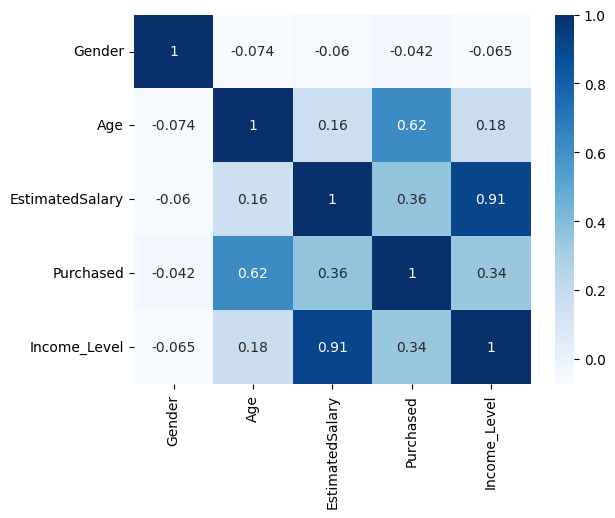

In [21]:
corr = cb.corr()
sns.heatmap(corr, cmap='Blues', annot=True);

## Corelation Interpretation

According to the displayed visual(correlation), There are both possitive and negative correlations with some features with a very weak correlation, some with moderate correlation and some with very high correlation.

- EstimatedSalary and Income level has a high possitive correlation(0.91) which shows theres a huge relationship between the two features
- Age and Puchased have a positive moderate correlation(0.62)
- Income level and gender have a very low negative correlation, this indicates that they have a strong negative relationships.

<Axes: xlabel='Income_Level', ylabel='EstimatedSalary'>

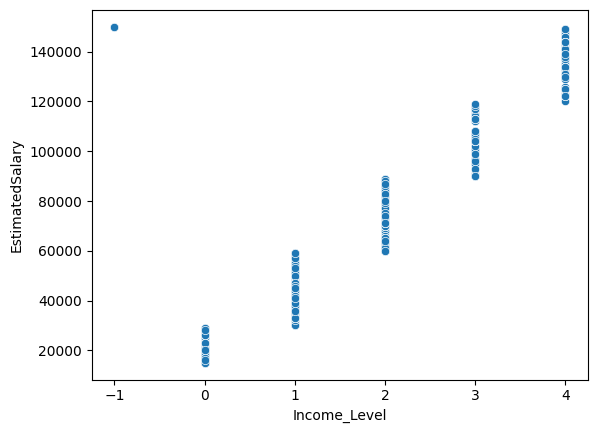

In [22]:
sns.scatterplot(data=cb, x='Income_Level', y='EstimatedSalary')

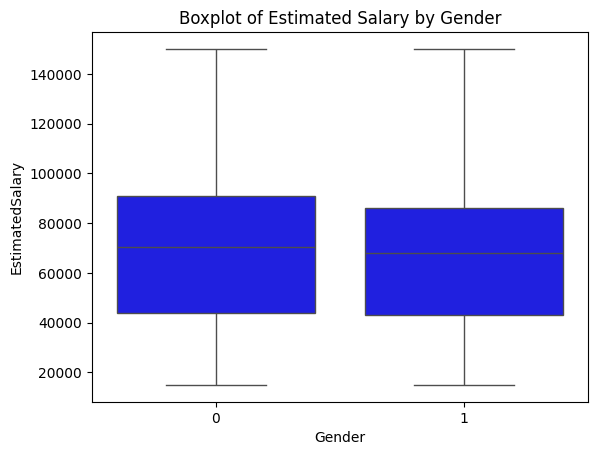

In [23]:
sns.boxplot(data=cb, x='Gender', y='EstimatedSalary', color='Blue')
plt.title('Boxplot of Estimated Salary by Gender')
plt.show()

In [24]:
cb['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [25]:
cb['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

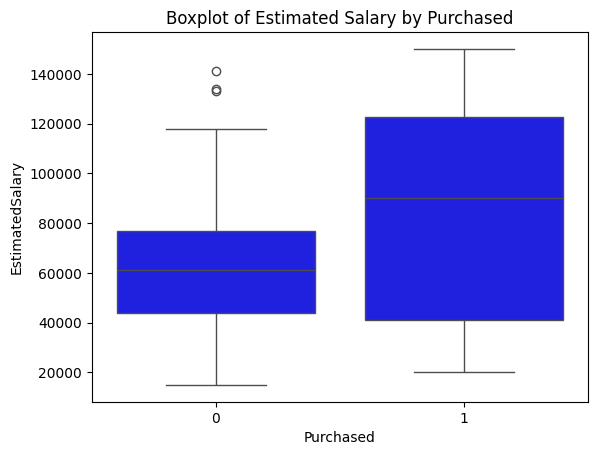

In [26]:
sns.boxplot(data=cb, x='Purchased', y='EstimatedSalary', color='Blue')
plt.title('Boxplot of Estimated Salary by Purchased')
plt.show()

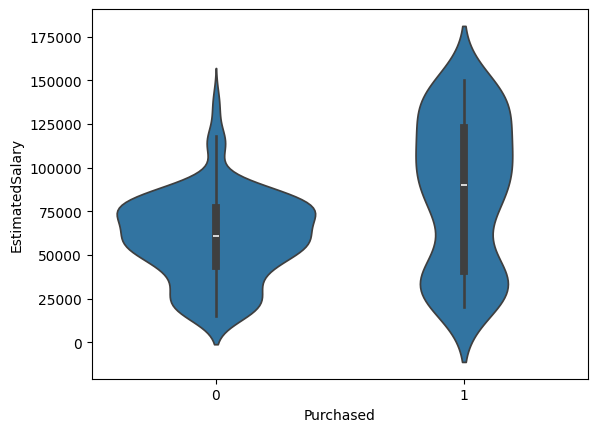

In [27]:
sns.violinplot(data=cb, x='Purchased', y='EstimatedSalary');

## Univariate Analysis

In [28]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           400 non-null    int64   
 1   Age              400 non-null    int64   
 2   EstimatedSalary  400 non-null    int64   
 3   Purchased        400 non-null    int64   
 4   Age_Group        393 non-null    category
 5   Income_Level     400 non-null    float64 
dtypes: category(1), float64(1), int64(4)
memory usage: 16.3 KB


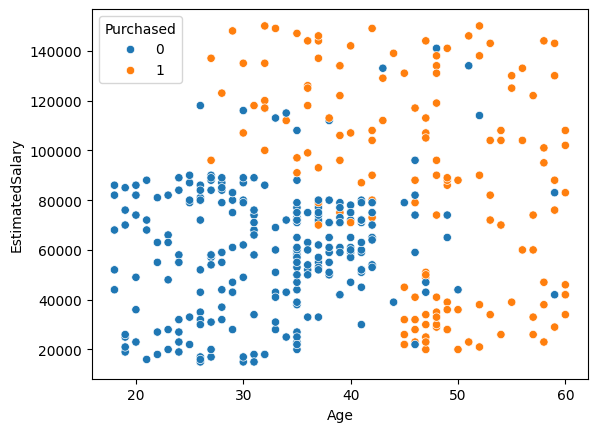

In [29]:
sns.scatterplot(data=cb, x='Age', y='EstimatedSalary', hue='Purchased');

Plotting a 3D scatter plot to give a better view

In [30]:
fig = px.scatter_3d(
        data_frame=cb,
        x='Age',
        y='EstimatedSalary',
        z='Gender',
        color='Purchased',
        template='ggplot2',
        opacity=0.6,
        height=700,
        title=f'3d scatter based on Age, EstimatedSalary, Gender and Purchased'
)

pio.show(fig)

## Observations to the data exploration:

According to the exploratory analysis, we observed that ages with lower estimated salary have less opportunity to make purchases compare to ages with higher salaries.

In [31]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           400 non-null    int64   
 1   Age              400 non-null    int64   
 2   EstimatedSalary  400 non-null    int64   
 3   Purchased        400 non-null    int64   
 4   Age_Group        393 non-null    category
 5   Income_Level     400 non-null    float64 
dtypes: category(1), float64(1), int64(4)
memory usage: 16.3 KB


In [32]:
cb['Age_Group'].isna().sum()

7

In [34]:
cb.dropna(inplace=True)

In [35]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           393 non-null    int64   
 1   Age              393 non-null    int64   
 2   EstimatedSalary  393 non-null    int64   
 3   Purchased        393 non-null    int64   
 4   Age_Group        393 non-null    category
 5   Income_Level     393 non-null    float64 
dtypes: category(1), float64(1), int64(4)
memory usage: 18.9 KB


## Scaling the Data

Since our datset comprises of categorical and numerical features, we need to consider three scaling approach
- MinMax Scaling: This is mostly used to scale data to a fixed range usually 0's and 1's. $X_{scaled} = (X-X_{min}) / (X_{max} - X_{min})$

- Standard Scaling (Z-score normalization): This method scales the data so that it has a mean of 0 and a standard deviation of 1. It's useful when your data has outliers
X_scaled =
σ
X−μ
​

Firsly, we will apply standardscler to the dataset to see if the mean is close to 0 and standard deviation is close to one. The reason for this approach is to check if standardizing the dataset using standard scalar or no. If the mean is not close to 0 and the standard deviation is not close to one then we will need to apply another approach.


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cb[['Age', 'EstimatedSalary']])

scaled_df = pd.DataFrame(scaled_data, columns=['Scaled_Age', 'Scaled_EstimatedSalary'])

mean_values = scaled_df.mean()
std_values = scaled_df.std()

print("Mean values after scaling:")
print(mean_values)
print("\nStandard deviation values after scaling:")
print(std_values)

Mean values after scaling:
Scaled_Age               -7.231987e-17
Scaled_EstimatedSalary    9.039984e-17
dtype: float64

Standard deviation values after scaling:
Scaled_Age                1.001275
Scaled_EstimatedSalary    1.001275
dtype: float64
